# **Project Name**    -  Smart City Traffic Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name - SHEIKH MOSTAQUL ARIF**      

# **Project Summary -**

As a data scientist working with the government to transform our city into a smart city, one of the critical challenges we face is managing traffic efficiently and planning for future infrastructure. The vision is to leverage digital and intelligent technologies to improve the overall quality of services for citizens. Addressing the city's traffic woes is a crucial step in this transformation journey.

Traffic congestion not only causes frustration and delays for commuters but also has significant economic and environmental implications. Excessive idling and stop-and-go traffic contribute to increased fuel consumption, air pollution, and greenhouse gas emissions. Additionally, traffic bottlenecks can hinder the smooth flow of goods and services, impacting business operations and productivity.

To tackle this challenge, the government aims to implement a robust traffic management system that can effectively handle traffic peaks and prepare for future growth. The key to achieving this lies in understanding the city's traffic patterns, including how they vary across different junctions, days of the week, and special occasions throughout the year.

Through the analysis of historical traffic data from the city's four major junctions, we can uncover valuable insights into traffic patterns. By examining factors such as vehicle counts, peak hours, and the influence of holidays and events, we can identify trends and anomalies that shape the city's traffic landscape.

One crucial aspect to consider is the impact of holidays and special occasions on traffic patterns. These events often disrupt the typical commuter routines and can lead to significant deviations from normal traffic flows. By analyzing data from previous years, we can identify how traffic patterns change during these periods and develop strategies to mitigate potential congestion.

Furthermore, understanding traffic patterns across different days of the week can reveal valuable insights. Weekdays typically experience higher traffic volumes during rush hours as people commute to and from work, while weekends may have different patterns influenced by leisure activities, shopping, and other factors.

By leveraging advanced data analytics techniques, including time series analysis, machine learning algorithms, and predictive modeling, we can forecast future traffic patterns with greater accuracy. These forecasts will provide the government with the necessary information to make informed decisions about infrastructure planning, traffic signal optimization, and resource allocation.

Moreover, the integration of real-time data sources, such as traffic cameras, sensors, and crowdsourced information, can further enhance our ability to monitor and respond to traffic situations dynamically. This real-time data can be combined with historical patterns and forecasts to provide a comprehensive view of the city's traffic landscape, enabling proactive measures to be taken to alleviate congestion and improve traffic flow.

Ultimately, transforming our city into a smart city requires a holistic approach that addresses various aspects of urban living, including transportation. By leveraging data-driven insights and advanced technologies, we can not only optimize traffic management but also pave the way for a more sustainable, efficient, and livable city for all citizens.

# **GitHub Link -**

https://github.com/Mostaqul143/Upskill-Campas

# **Problem Statement**


*   **Analyze historical traffic data from the four major junctions of the city to identify patterns and trends in vehicle counts, peak hours, and the influence of holidays and special occasions.**

*   **Develop predictive models to forecast future traffic volumes and patterns, taking into account factors such as time of day, day of the week, seasonal variations, and special events.**

*   **Provide data-driven recommendations to the government for infrastructure planning, traffic signal optimization, and resource allocation to effectively handle traffic peaks and prepare for future growth.**

*   **Integrate real-time data sources, such as traffic cameras, sensors, and crowdsourced information, to enable dynamic monitoring and responsive measures to alleviate congestion and improve traffic flow.**

*   **Contribute to the overall vision of transforming the city into a smart and intelligent urban environment by leveraging data analytics, machine learning, and advanced technologies to optimize traffic management and enhance the efficiency of services for citizens.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [90]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Dataset Loading

In [2]:
# Load Dataset

test_df = pd.read_csv("test.csv")
train_df= pd.read_csv("train.csv")



### Dataset First View

In [3]:
# Dataset First Look

train_df.head(3)

,DateTime,Junction,Vehicles,ID
0,01-11-2015 0.00,1,15,20151101001
1,01-11-2015 1.00,1,13,20151101011
2,01-11-2015 2.00,1,10,20151101021


In [4]:
train_df.head(2)

,DateTime,Junction,Vehicles,ID
0,01-11-2015 0.00,1,15,20151101001
1,01-11-2015 1.00,1,13,20151101011


In [5]:
test_df.head(2)

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011


### Dataset Rows & Columns count

In [6]:
train_df.shape

(48120, 4)

In [7]:
test_df.shape

(11808, 3)

In [8]:
# Dataset Rows & Columns count (For Train Dataset)

print(f"Number Of Rows {train_df.shape[0]}")
print(f"Number Of Columns {train_df.shape[1]}")


Number Of Rows 48120
Number Of Columns 4


In [9]:
# Dataset Rows & Columns count (For Test Dataset)

print(f"Number Of Rows {test_df.shape[0]}")
print(f"Number Of Columns {test_df.shape[1]}")


Number Of Rows 11808
Number Of Columns 3


### Dataset Information

In [10]:
# Dataset Info

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  11808 non-null  object
 1   Junction  11808 non-null  int64 
 2   ID        11808 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.9+ KB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count ( For Train Dataset)

num_duplicates = train_df.duplicated().sum()
print(f"Number of Duplicate Values: {num_duplicates}")

Number of Duplicate Values: 0


In [13]:
# Dataset Duplicate Value Count ( For Test Dataset)

num_duplicates = test_df.duplicated().sum()
print(f"Number of Duplicate Values: {num_duplicates}")

Number of Duplicate Values: 0


#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count ( For Train Dataset)

num_missing = train_df.isnull().sum()
print("Number of Missing Values:\n", num_missing)

Number of Missing Values:
 DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


In [15]:
# Missing Values/Null Values Count ( For Test Dataset)

num_missing = test_df.isnull().sum()
print("Number of Missing Values:\n", num_missing)

Number of Missing Values:
 DateTime    0
Junction    0
ID          0
dtype: int64


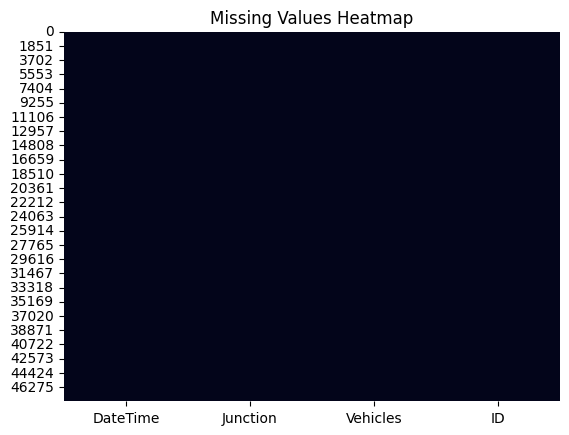

In [16]:
# Visualizing the missing values ( For Train Dataset)

sns.heatmap(train_df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

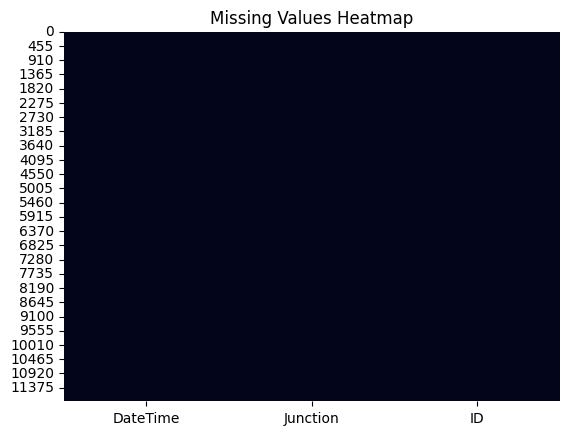

In [17]:
# Visualizing the missing values ( For Test Dataset)

sns.heatmap(test_df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

**There are  48120 Number of  Rows and 4 Numbers of Columns Present in my Train dataset.**

**There are  11808 Number of  Rows and 3 Numbers of Columns Present in my Test dataset.**

**There are 3 Numerical Columns and 1 Categorical Columns Present in my Train Dataset**

**There are 2 Numerical Columns and 1 Categorical Columns Present in my Train Dataset**

**There are No Missing Values in my Train and Test Dataset.**

**There are No Duplicate Values in my  Train and Test Dataset.**


## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns

train_df.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')

In [19]:
# Dataset Describe

train_df.describe(include='all')

,DateTime,Junction,Vehicles,ID
count,48120,48120.000000,48120.000000,4.812000e+04
unique,14592,NaN,NaN,NaN
top,30-06-2017 23.00,NaN,NaN,NaN
freq,4,NaN,NaN,NaN
mean,NaN,2.180549,22.791334,2.016330e+10
std,NaN,0.966955,20.750063,5.944854e+06
min,NaN,1.000000,1.000000,2.015110e+10
25%,NaN,1.000000,9.000000,2.016042e+10
50%,NaN,2.000000,15.000000,2.016093e+10
75%,NaN,3.000000,29.000000,2.017023e+10


### Variables Description 

**DateTime:** This is a datetime variable representing the date and time, likely in hourly intervals.

**Junction:** This is a categorical variable that seems to represent an identifier for a specific location or intersection.

**Vehicles:** This is a numerical variable representing the number of vehicles at the given DateTime and Junction.

**ID:** This is a unique identifier for each row in the dataset.

### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.

for i in train_df.columns.tolist():
  print("No. of unique values in ",i,"is",train_df[i].nunique(),".")

No. of unique values in  DateTime is 14592 .
No. of unique values in  Junction is 4 .
No. of unique values in  Vehicles is 141 .
No. of unique values in  ID is 48120 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [21]:
# Convert 'DateTime' column to datetime type with specified format

train_df['DateTime'] = pd.to_datetime(train_df['DateTime'], format='%d-%m-%Y %H.%M')
test_df["DateTime"]=pd.to_datetime(test_df["DateTime"])

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  11808 non-null  datetime64[ns]
 1   Junction  11808 non-null  int64         
 2   ID        11808 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 276.9 KB


In [24]:
train_df["Day"]= train_df["DateTime"].dt.strftime("%A")
train_df['Month'] = train_df['DateTime'].dt.month
train_df['Year'] = train_df['DateTime'].dt.year
train_df["Hour"] = train_df["DateTime"].dt.hour


In [25]:
train_df.head()

,DateTime,Junction,Vehicles,ID,Day,Month,Year,Hour
0,2015-11-01 00:00:00,1,15,20151101001,Sunday,11,2015,0
1,2015-11-01 01:00:00,1,13,20151101011,Sunday,11,2015,1
2,2015-11-01 02:00:00,1,10,20151101021,Sunday,11,2015,2
3,2015-11-01 03:00:00,1,7,20151101031,Sunday,11,2015,3
4,2015-11-01 04:00:00,1,9,20151101041,Sunday,11,2015,4


### What all manipulations have you done and insights you found?

Extracted the day of the week from the DateTime column and added it as a new column named "Day".

Extracted the month from the DateTime column and added it as a new column named "Month".

Extracted the year from the DateTime column and added it as a new column named "Year".

Extracted the hour from the DateTime column and added it as a new column named "Hour".

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0, 0.5, 'Average Number of Vehicles')

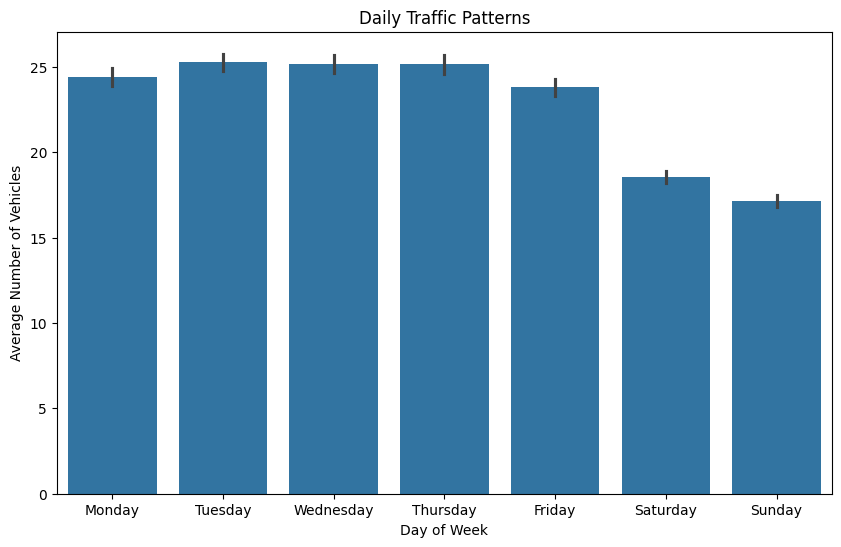

In [26]:
# Daily Traffic Patterns

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=train_df, x='Day', y='Vehicles', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily Traffic Patterns')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Vehicles')



##### 1. Why did you pick the specific chart?


The bar plot showing daily traffic patterns was chosen because it provides a clear and concise comparison of average traffic levels across different days of the week. This visualization allows for quick identification of trends and insights regarding peak and off-peak traffic days, which are crucial for informing infrastructure planning and traffic management strategies.

##### 2. What is/are the insight(s) found from the chart?

*   **Monday, Tuesday, Wednesday, Thursday, and Friday show higher average traffic compared to the weekend days (Saturday and Sunday). This suggests that traffic is generally heavier during weekdays, likely due to people commuting to work or running errands.**

*   **Saturday and Sunday exhibit lower average traffic compared to weekdays. This could indicate that fewer people are commuting for work-related purposes on weekends, resulting in reduced traffic congestion.**

*   **Tuesday has the highest average number of vehicles among the weekdays, suggesting that it might experience peak traffic congestion during the week. This could be due to various factors such as specific events or routine schedules.**

*   **Sunday has the lowest average traffic among all the days of the week, indicating that it is likely the least congested day for traffic in the city.**

#### Chart - 2

Text(0, 0.5, 'Average Number of Vehicles')

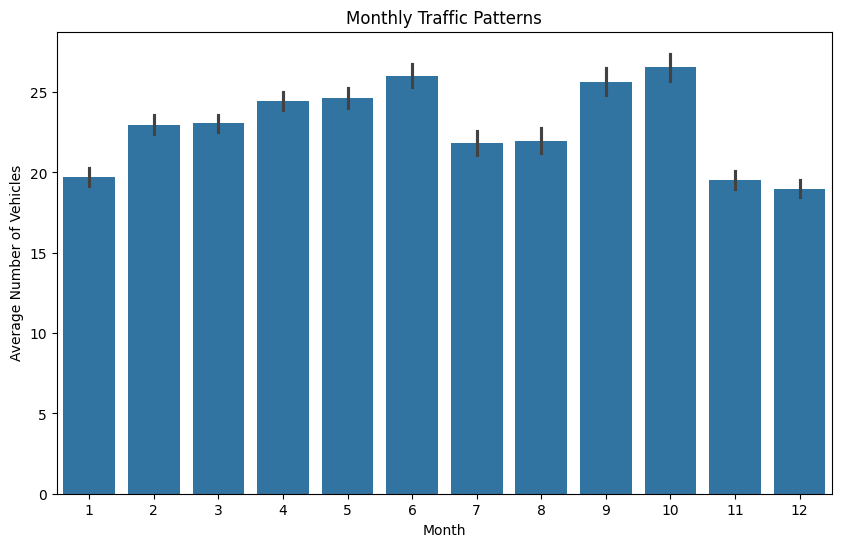

In [27]:
# Monthly Traffic Patterns (Bar plot)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=train_df, x='Month', y='Vehicles')
plt.title('Monthly Traffic Patterns')
plt.xlabel('Month')
plt.ylabel('Average Number of Vehicles')



##### 1. Why did you pick the specific chart?


The monthly traffic patterns bar chart was selected because it provides a clear comparison of average traffic levels across different months. This visualization allows for quick identification of seasonal variations and insights into traffic trends throughout the year, which are essential for informing infrastructure planning and traffic management strategies.

##### 2. What is/are the insight(s) found from the chart?

*   **Traffic tends to be lower during the colder months, with January, November, and December showing the lowest average traffic.**

*   **Traffic increases as the weather gets warmer, with June, July, and August experiencing higher average traffic.**

*   **June, July, and August stand out with the highest average traffic, likely due to increased outdoor activities, tourism, and vacation periods during the summer months.**

*   **February, March, April, May, September, and October show moderate average traffic levels, indicating transitional periods between seasons.**

#### Chart - 3

Text(0, 0.5, 'Total Number of Vehicles')

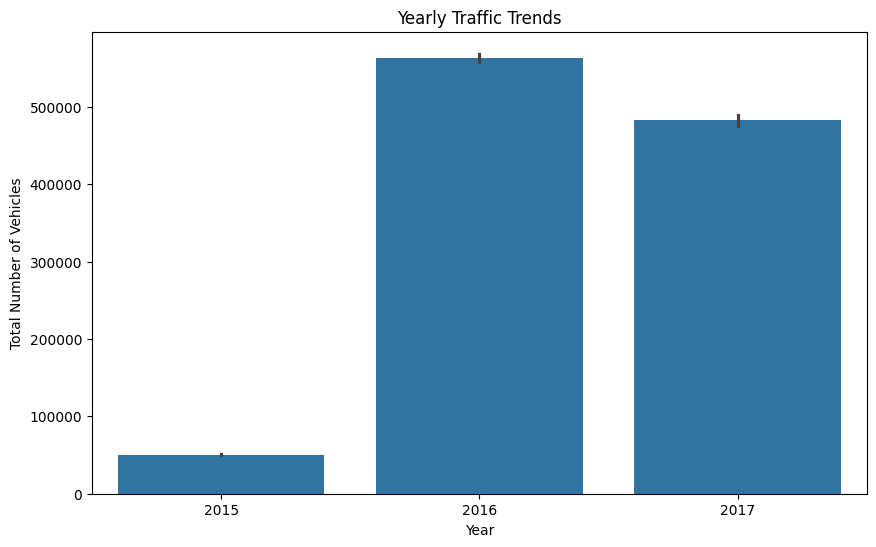

In [28]:
# Yearly Traffic Trends

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=train_df, x='Year', y='Vehicles', estimator=sum)
plt.title('Yearly Traffic Trends')
plt.xlabel('Year')
plt.ylabel('Total Number of Vehicles')



##### 1. Why did you pick the specific chart?


The yearly traffic trends bar chart was chosen because it provides a concise comparison of total traffic volume across different years. This visualization allows for quick identification of trends and insights into the overall trajectory of traffic over time, which is crucial for informing long-term infrastructure planning and transportation management strategies.

##### 2. What is/are the insight(s) found from the chart?

*   **2016 recorded the highest total number of vehicles, indicating a significant increase in traffic compared to other years.**

*   **2015 recorded the lowest total number of vehicles, indicating a significant decrease in traffic compared to other years.**

*   **Traffic volume decreased in 2017 compared to 2016, suggesting a potential shift in commuting patterns or other factors affecting traffic flow.**

#### Chart - 4

Text(0, 0.5, 'Average Number of Vehicles')

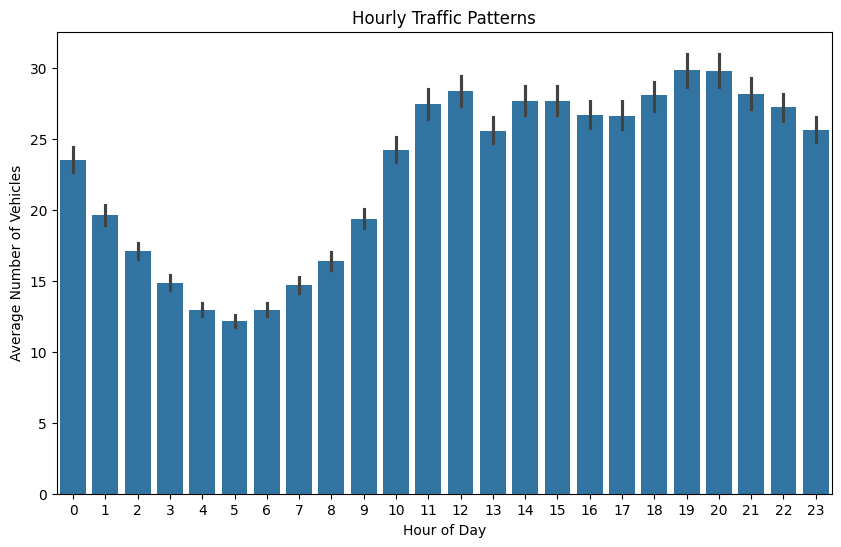

In [29]:
# Hourly Traffic Patterns 

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=train_df, x='Hour', y='Vehicles')
plt.title('Hourly Traffic Patterns')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Vehicles')




##### 1. Why did you pick the specific chart?

The hourly traffic patterns bar chart was selected because it provides a clear visualization of traffic volume throughout the day. This allows for quick identification of peak traffic hours, facilitating effective planning of traffic management strategies and infrastructure improvements to address congestion during high-demand periods.

##### 2. What is/are the insight(s) found from the chart?

*   **Traffic starts to increase gradually from 6 AM, peaking during the morning rush hours around 8 AM and 9 AM, suggesting heavy commuter traffic during these hour**

*   **Traffic volume begins to rise again in the late afternoon, reaching another peak during the evening rush hours around 5 PM to 7 PM. This pattern reflects the return commute from work and school, contributing to increased congestion on the roads.**

*   **Traffic gradually decreases in the late evening and overnight hours, with the lowest traffic observed around 3 AM and 4 AM. This decrease indicates fewer vehicles on the roads during the nighttime hours.**

#### Chart - 5 - Correlation Heatmap

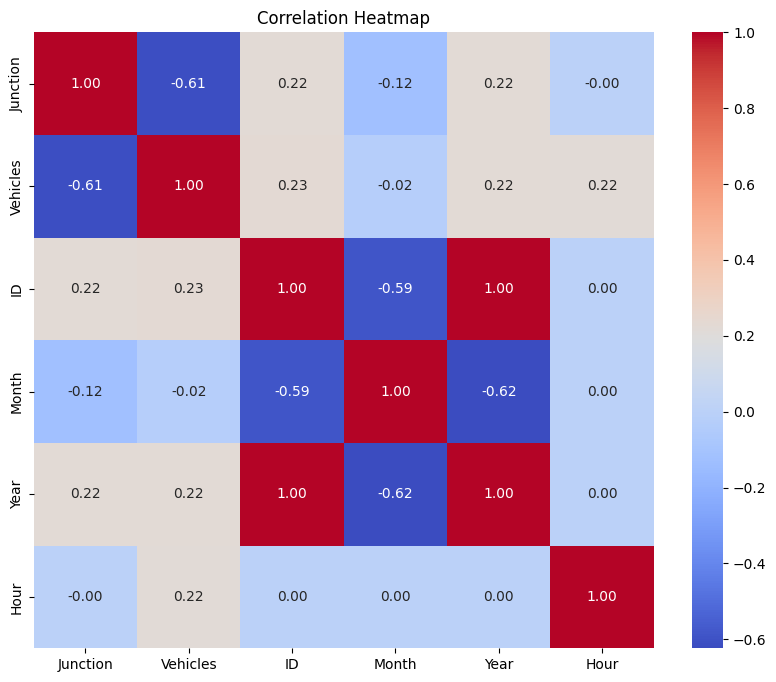

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = train_df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?


The correlation heatmap was chosen because it provides a concise visual representation of the relationships between numerical variables in the dataset. This visualization allows for quick identification of strong correlations (positive or negative) between different features, helping to identify potential patterns and dependencies in the data.

#### Chart - 6 - Pair Plot 

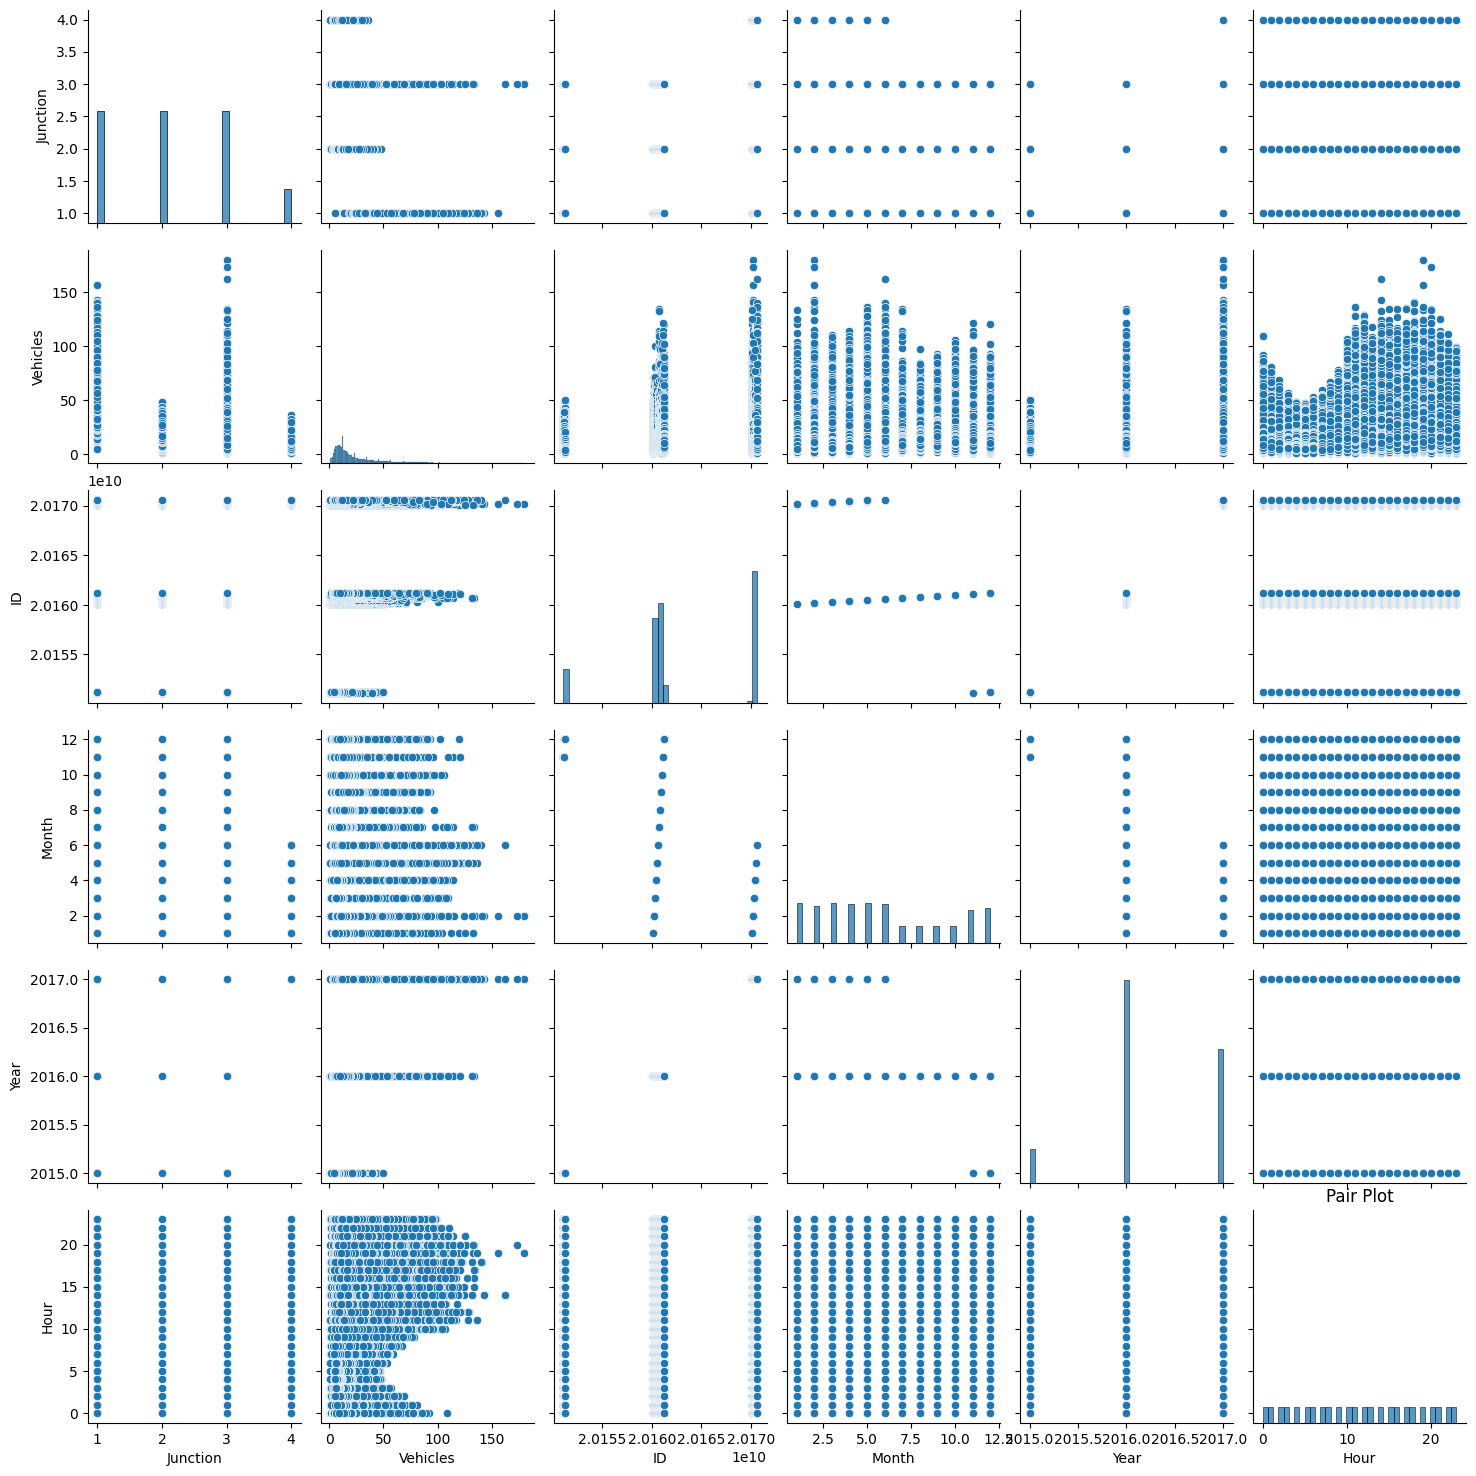

In [31]:
# Pair Plot visualization code

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = train_df.select_dtypes(include=['number'])

# Plot pair plot
sns.pairplot(numeric_columns)
plt.title('Pair Plot')
plt.show()


##### 1. Why did you pick the specific chart?


The pair plot was chosen because it provides a concise visualization of pairwise relationships between numerical variables in the dataset. This allows for quick identification of patterns, correlations, and potential trends among multiple variables simultaneously.

### 5. Categorical Encoding

In [32]:
# Encode your categorical columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



In [33]:
le.fit(train_df["Day"])
train_df["Day"]=le.transform(train_df["Day"])


In [34]:
le.fit(train_df["Month"])
train_df["Month"]=le.transform(train_df["Month"])

In [35]:
le.fit(train_df["Year"])
train_df["Year"]=le.transform(train_df["Year"])

In [36]:
train_df["Hour"]=train_df["Hour"].astype("int64")

In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
 4   Day       48120 non-null  int32         
 5   Month     48120 non-null  int64         
 6   Year      48120 non-null  int64         
 7   Hour      48120 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(6)
memory usage: 2.8 MB


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used Label Encoding to encode categorical variables such as "Day", "Month", and "Year". This technique was chosen because these variables have ordinal relationships where the order matters (e.g., Monday < Tuesday < Wednesday). Label Encoding assigns a unique integer to each category, preserving the ordinal relationship, which is suitable for such variables.

### 6. Data Splitting

In [78]:
# Split your data to train and test. Choose Splitting ratio wisely.

X= train_df.drop(["DateTime","Vehicles"],axis=1)
y=train_df["Vehicles"]




In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (38496, 6)
Shape of X_test (9624, 6)
Shape of y_train (38496,)
Shape of y_test (9624,)


##### What data splitting ratio have you used and why? 

The data splitting ratio used in this code is 80% for training data and 20% for testing data.
This is specified by the parameter test_size=0.2 in the train_test_split() function.

### 7. Data Scaling

In [83]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [84]:
sc.fit(X_train)

StandardScaler()

In [86]:
X_train=sc.transform(X_train)
X_test = sc.transform(X_test)

In [88]:
X_train,y_train

(array([[ 8.46865451e-01, -2.03388157e+00,  9.97759414e-01,
          1.71181804e+00, -2.06154162e+00,  6.49947100e-01],
        [ 8.46865451e-01, -2.03556009e+00, -5.01040539e-01,
          1.71181804e+00, -2.06154162e+00,  9.39544696e-01],
        [ 8.46865451e-01, -4.86893868e-01,  1.49735940e+00,
         -5.28072759e-01, -4.38747857e-01,  3.60349503e-01],
        ...,
        [ 8.46865451e-01, -3.69989915e-01,  9.97759414e-01,
          1.43183169e+00, -4.38747857e-01,  1.51873989e+00],
        [-1.22198418e+00, -2.03538887e+00, -1.44055482e-03,
          1.71181804e+00, -2.06154162e+00,  1.22914229e+00],
        [-1.87559362e-01, -2.03289448e+00, -1.00064052e+00,
          1.71181804e+00, -2.06154162e+00, -1.23243728e+00]]),
 30256     5
 30018     1
 33134    18
 38627    21
 16658    12
          ..
 11284    37
 44732     8
 38158    10
 860      21
 15795     5
 Name: Vehicles, Length: 38496, dtype: int64)

##### Which method have you used to scale you data and why?

The StandardScaler method has been used to scale the data. StandardScaler standardizes the features by subtracting the mean and dividing by the standard deviation of each feature. This ensures that each feature has a mean of 0 and a standard deviation of 1.

The StandardScaler method is commonly used when the features in the dataset have different scales and it is desirable to bring them to a similar scale. It helps to normalize the features, making them more comparable and preventing certain features from dominating the model's learning process due to their larger magnitude.

Overall, the choice of StandardScaler for scaling the data was made to mitigate the impact of feature scales and ensure a more effective and reliable model training process.

## ***7. ML Model Implementation***

### ML Model - 1

In [93]:
# ML Model - 1 Implementation LinearRegression

lr = LinearRegression()

# Fit the Algorithm
lr.fit(X_train,y_train)

# Predict on the model

y_pred=lr.predict(X_test)

In [98]:
y_pred

array([25.15825783, 14.88470804, 16.7775721 , ..., 28.47778329,
       10.81867   , 33.07551794])

In [99]:
#Finding "MSE,"RMSE" and R2_SCORE


'''MSE (Mean Squared Error): MSE is a metric used to measure the average squared difference
between the predicted and actual values in a regression problem.
It gives higher weight to larger errors, making it sensitive to outliers. '''

'''RMSE (Root Mean Squared Error): RMSE is the square root of MSE and is commonly used as a
measure of the average magnitude of the residuals (prediction errors) in a regression
problem. It provides a more interpretable scale as it is in the same unit as the target variable.'''

'''R2 Score (Coefficient of Determination): R2 Score represents the proportion of the variance in the
dependent variable (target) that can be explained by the independent variables in a
regression model. It ranges from 0 to 1, where 0 indicates that the model explains none of
the variance and 1 indicates that the model explains all the variance.'''



MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)

MSE : 168.981919832787
RMSE : 12.999304590353555
R2 : 0.5853680041721667


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<function matplotlib.pyplot.show(close=None, block=None)>

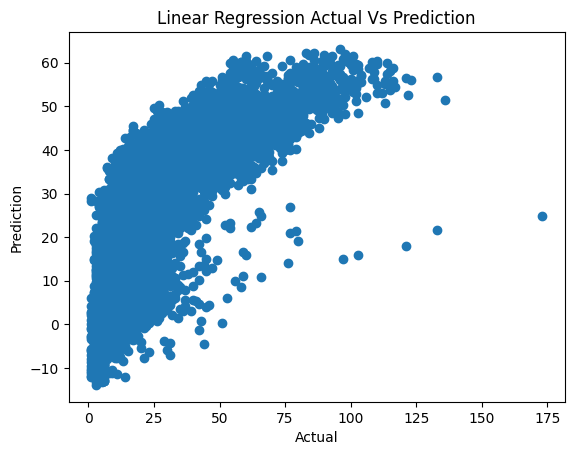

In [97]:
# Visualizing evaluation Metric Score chart

plt.scatter(y_test,y_pred)
plt.title("Linear Regression Actual Vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show

### ML Model - 2

In [100]:
# ML Model - 2 Implementation- LassoRegression

lar = Lasso()

lar.fit(X_train,y_train)

y_pred_lar=lar.predict(X_test)



In [101]:
y_pred_lar

array([23.07693878, 13.61093895, 17.04835399, ..., 28.81970348,
       10.05840653, 29.37306331])

In [103]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_lar)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_lar)
print("R2 :" ,r2)

MSE : 175.0354711226461
RMSE : 13.230097169811192
R2 : 0.570514367430176


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<function matplotlib.pyplot.show(close=None, block=None)>

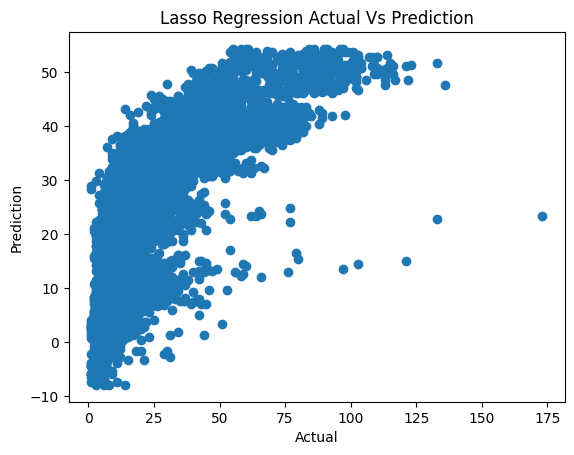

In [111]:
# Visualizing evaluation Metric Score chart



plt.scatter(y_test,y_pred_lar)
plt.title("Lasso Regression Actual Vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show

### ML Model - 3

In [106]:
# ML Model - 3 Implementation- RidgeRegression

rid = Ridge()

# Fit the Algorithm

rid.fit(X_train,y_train)

# Predict on the model

y_pred_rid = rid.predict(X_test)

In [107]:
 y_pred_rid

array([24.68460398, 14.07536916, 16.22832212, ..., 28.91462398,
       10.85733648, 33.64972589])

In [108]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_rid)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_rid)
print("R2 :" ,r2)

MSE : 169.18035794198258
RMSE : 13.006934994147644
R2 : 0.5848810953398759


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<function matplotlib.pyplot.show(close=None, block=None)>

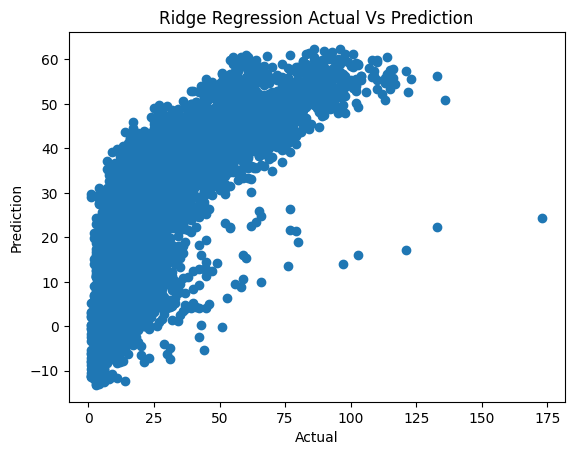

In [110]:
# Visualizing evaluation Metric Score chart

plt.scatter(y_test,y_pred_rid)
plt.title("Ridge Regression Actual Vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show

### ML Model - 4

In [113]:
# ML Model - 4 Implementation- Decision Tree

dtr=DecisionTreeRegressor()

# Fit the Algorithm

dtr.fit(X_train,y_train)

# Predict on the model

y_pred_dtr=dtr.predict(X_test)

In [114]:
y_pred_dtr

array([ 8., 78.,  6., ..., 14.,  8., 14.])

In [115]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_dtr)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_dtr)
print("R2 :" ,r2)

MSE : 21.769222776392354
RMSE : 4.665749969339586
R2 : 0.9465847216298169


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<function matplotlib.pyplot.show(close=None, block=None)>

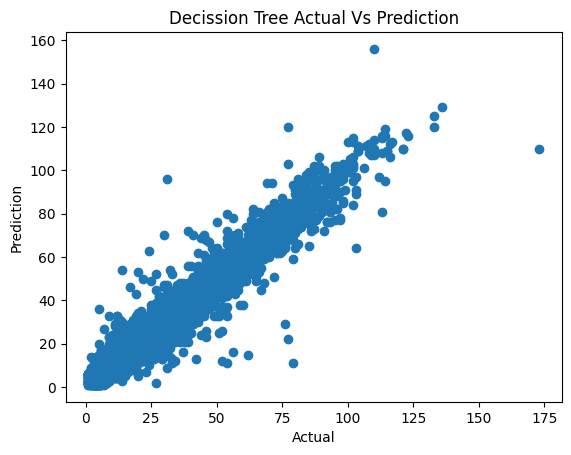

In [116]:
plt.scatter(y_test,y_pred_dtr)
plt.title("Decission Tree Actual Vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show

### ML Model - 5

In [117]:
# ML Model - 5 Implementation- RandomForestRegressor

rfr=RandomForestRegressor()

# Fit the Algorithm

rfr.fit(X_train,y_train)

# Predict on the model

y_pred_rfr=rfr.predict(X_test)

In [118]:
y_pred_rfr

array([10.09, 51.39,  8.19, ..., 14.43,  8.1 , 15.88])

In [119]:
#Finding "MSE,"RMSE" and R2_SCORE

MSE  = mean_squared_error(y_test,y_pred_rfr)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_rfr)
print("R2 :" ,r2)

MSE : 12.856689526184539
RMSE : 3.5856226134640186
R2 : 0.9684534603272605


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<function matplotlib.pyplot.show(close=None, block=None)>

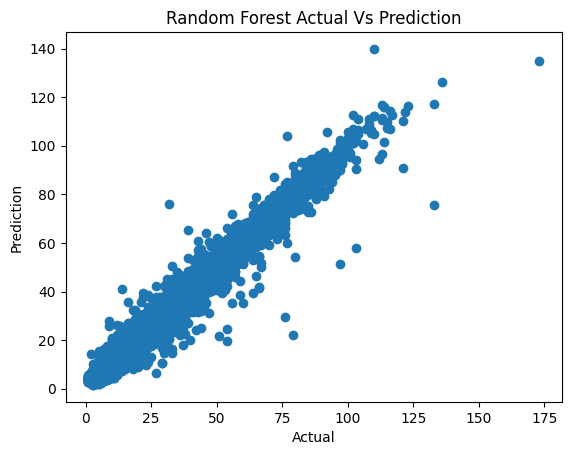

In [120]:
plt.scatter(y_test,y_pred_rfr)
plt.title("Random Forest Actual Vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show

# **Conclusion**

User
| Model Name                   | Accuracy (R2 Score)             |
|------------------------------|----------------------|
| 1. LinearRegression             |        58.0%              |
| 2. LassoRegression              |        57.0%         |
| 3. RidgeRegression              |        58.4%         |
| 4. Decision Tree Regressor      |        94..6%         |
| 5. RandomForestRegressor        |        96.8%         |


*   **The decision tree regressor and random forest regressor significantly outperformed the linear models (linear regression, lasso regression, and ridge regression) in terms of accuracy.**

*   **This highlights the importance of considering more complex models, especially when dealing with non-linear relationships or high-dimensional datasets.However, it's essential to strike a balance between model complexity and interpretability, depending on the specific requirements and constraints of the problem at hand.**

*   **Further tuning and optimization of the chosen models may lead to even better performance, but the decision tree and random forest models are promising candidates for accurate predictions in this context.**